# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Reading the Data

In [2]:
df=pd.read_csv('cell.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df=df.drop('ID',axis=1)

In [6]:
df.dtypes

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
df.BareNuc.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [8]:
df.loc[df['BareNuc']=='?','BareNuc']=df.drop('BareNuc',axis=1)

In [9]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
df.isnull().sum()

Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [11]:
df.BareNuc=df.BareNuc.fillna(df.BareNuc.median())

In [12]:
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [13]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [14]:
df.skew()

Clump          0.592859
UnifSize       1.233137
UnifShape      1.161859
MargAdh        1.524468
SingEpiSize    1.712172
BareNuc        1.025347
BlandChrom     1.099969
NormNucl       1.422261
Mit            3.560658
Class          0.654564
dtype: float64

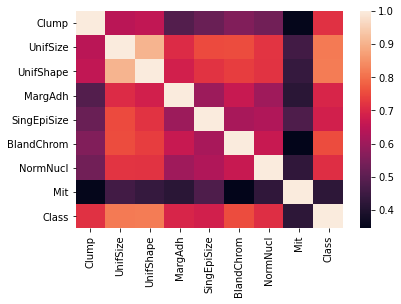

In [15]:
sns.heatmap(df.corr())

In [16]:
df.corr()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
Clump,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
UnifSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
UnifShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
MargAdh,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
SingEpiSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
BlandChrom,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
NormNucl,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mit,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


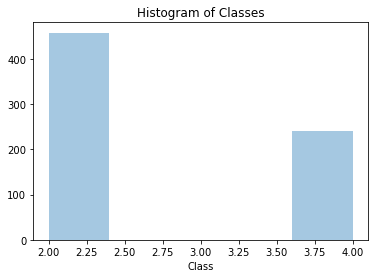

In [30]:
plt.title('Histogram of Classes')
sns.distplot(df.Class,kde=False)


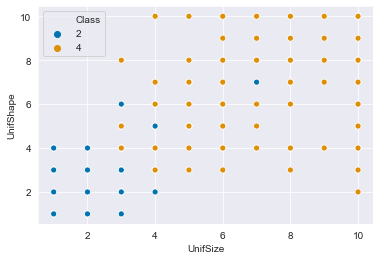

In [38]:
sns.set_style('darkgrid')
sns.scatterplot(x='UnifSize',y='UnifShape',data=df,hue='Class',palette='colorblind')

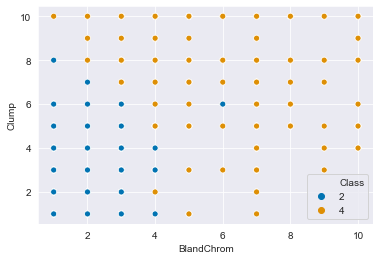

In [39]:
sns.set_style('darkgrid')
sns.scatterplot(x='BlandChrom',y='Clump',data=df,hue='Class',palette='colorblind')

In [40]:
target=df.Class
df=df.drop('Class',axis=1)

# Training the Model

In [41]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

# Gradient Boosted Trees

In [44]:
steps=[('gb',GradientBoostingClassifier())]
pipeline=Pipeline(steps)
parameters={'gb__max_depth':np.arange(1,4),'gb__n_estimators':np.arange(1,8),'gb__learning_rate':np.arange(1,11)}

In [45]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [46]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gb',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
          

In [47]:
cv.best_params_

{'gb__learning_rate': 1, 'gb__max_depth': 3, 'gb__n_estimators': 5}

In [48]:
cv_pred=cv.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
accuracy_score(Y_test,cv_pred)

0.9642857142857143

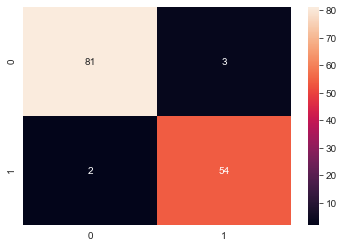

In [51]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

In [52]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        84
           4       0.95      0.96      0.96        56

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [53]:
rb_bestscore=cv.best_score_
print(rb_bestscore)

0.9481338481338482


# SVM

In [54]:
steps=[('svc',SVC())]
pipeline=Pipeline(steps)
parameters={'svc__C':np.logspace(0.1,10)}

In [55]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [56]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             p...
       3.67541279e+06, 5.85257434e+06, 9.31939576e+06, 1.48398179e+07,
       2.36303083e+07, 3.76279193e+07, 5.99171324e+07, 9.5

In [57]:
cv.best_params_

{'svc__C': 1.2589254117941673}

In [58]:
svc_bestscore=cv.best_score_
print(svc_bestscore)

0.9606177606177606


In [59]:
cv_pred=cv.predict(X_test)

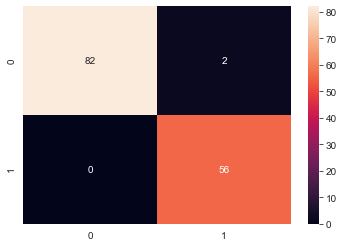

In [60]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

In [61]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        84
           4       0.97      1.00      0.98        56

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [62]:
accuracy_score(Y_test,cv_pred)

0.9857142857142858

# Logisitic Regression

In [63]:
steps=[('lr',LogisticRegression())]
pipeline=Pipeline(steps)
parameters={'lr__C':np.logspace(0.1,10)}

In [64]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [65]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                                  

In [66]:
cv.best_params_

{'lr__C': 1.2589254117941673}

In [67]:
cv_pred=cv.predict(X_test)

In [68]:
lr_best=cv.best_score_
print(lr_best)

0.96243564993565


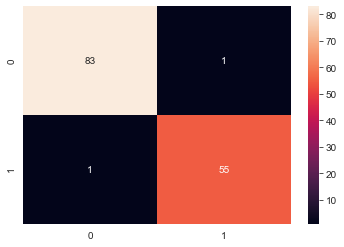

In [69]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

# Decision Trees

In [70]:
steps=[('dt',DecisionTreeClassifier())]
pipeline=Pipeline(steps)
parameters={'dt__max_depth':np.arange(1,5),'dt__max_features':np.arange(1,6)}

In [71]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [72]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                          

In [73]:
cv.best_params_

{'dt__max_depth': 4, 'dt__max_features': 2}

In [74]:
dt_score=cv.best_score_
print(dt_score)

0.9570624195624194


In [75]:
cv_pred=cv.predict(X_test)

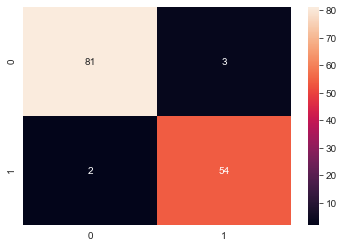

In [76]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

In [77]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        84
           4       0.95      0.96      0.96        56

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [78]:
accuracy_score(Y_test,cv_pred)

0.9642857142857143

In [87]:
a=['DecisionTrees','LogisticRegression','SupportVectorMachines','GradientBoostingTrees']
b=[dt_score,lr_best,svc_bestscore,rb_bestscore]

In [88]:
zip_generator=zip(a,b)

In [89]:
print(list(zip_generator))

[('DecisionTrees', 0.9570624195624194), ('LogisticRegression', 0.96243564993565), ('SupportVectorMachines', 0.9606177606177606), ('GradientBoostingTrees', 0.9481338481338482)]


Logistic Regression gives the best score with : 0.96243564993565